In [ ]:
# 로지스틱 회귀

2097152


질병의 음성과 양성을 나눌 때, 로지스틱 회귀를 사용하는 경우가 있다.

0과 1을 나누는 것은 보통 분류에 속하지만 로지스틱 회귀를 사용하기도 한다.

1 : 양성 (질병)

0 : 음성 (건강함) 

시그모이드(sigmoid) 함수를 사용한다.
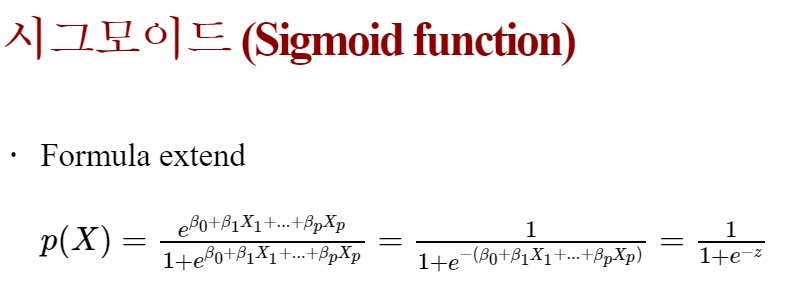

시그모이드 함수를 사용하는 이유는 기존의 지수함수(exponential function)이 z값이 증가할 수록, 무한대로 가게 될 때 y의 값('exp(-z)')이 0이 되기 때문이다.(식이y = e**-z 일때)

시그모이드 함수의 장점은 z값이 무한으로 증가해도, y값은 1에 수렴하여, 값을 표시하기 좋다는 것이다.

다만 코드는 loss function을 구현하여 역으로 표시한다.

In [ ]:
# theta''이 theta'보다 더 좋다.

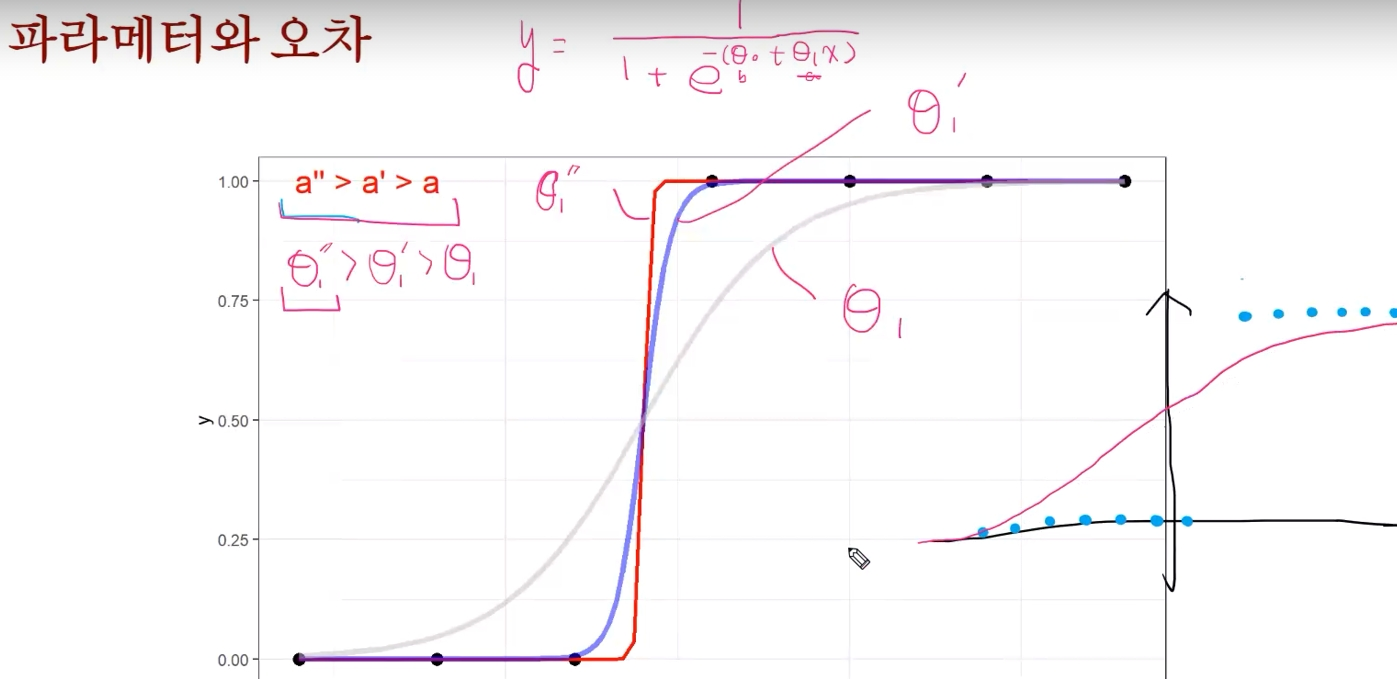

[ 2  4  6  8 10 12 14]
[0 0 0 1 1 1 1]


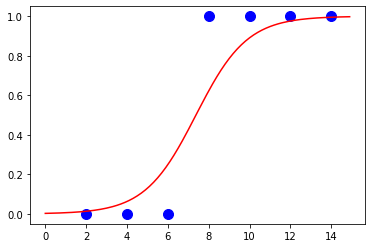

In [ ]:
# 시그코이드 함수를 만들어보자
import numpy as np
import matplotlib.pyplot as plt

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data_ = np.array(data)[:, 0] 
y_data_ = np.array(data)[:, 1]
print(x_data_)
print(y_data_)

# 시그모이드 함수 수식을 임의로 정해준다.
x = np.arange(0, 15, 0.1)
y = 1/(1+np.e**(-(0.8*x -5.9)))
# x, y값을 확인한다.
plt.scatter(x_data_, y_data_, s = 100, c = 'blue')
plt.plot(x, y, c= 'red')
plt.show()

# 결과 : 시그모이드 함수가 잘 그려짐을 확인하였다.

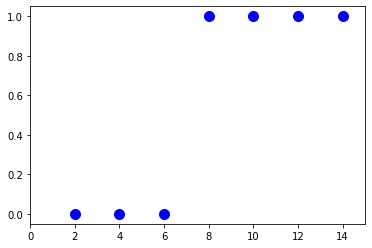

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=0, 기울기=0.2860, 절편=-0.0029


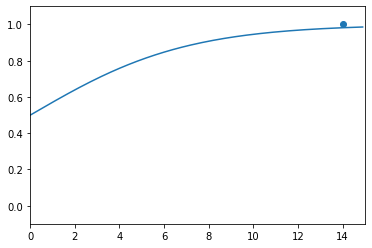

epoch=500, 기울기=1.1684, 절편=-7.4486
epoch=500, 기울기=1.1567, 절편=-7.4516
epoch=500, 기울기=1.0442, 절편=-7.4703
epoch=500, 기울기=1.1612, 절편=-7.4557
epoch=500, 기울기=1.1689, 절편=-7.4549
epoch=500, 기울기=1.1698, 절편=-7.4549
epoch=500, 기울기=1.1698, 절편=-7.4548
epoch=500, 기울기=1.1698, 절편=-7.4548


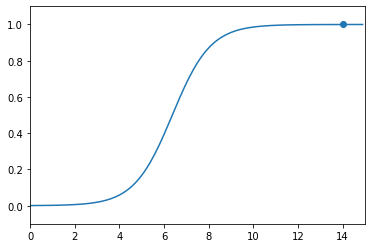

epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440


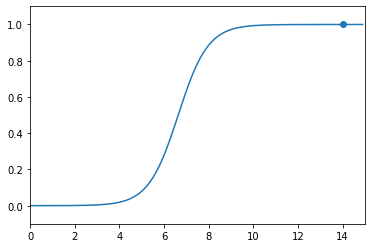

epoch=1500, 기울기=1.7268, 절편=-11.6347
epoch=1500, 기울기=1.7250, 절편=-11.6352
epoch=1500, 기울기=1.6600, 절편=-11.6460
epoch=1500, 기울기=1.7253, 절편=-11.6378
epoch=1500, 기울기=1.7271, 절편=-11.6377
epoch=1500, 기울기=1.7272, 절편=-11.6376
epoch=1500, 기울기=1.7272, 절편=-11.6376
epoch=1500, 기울기=1.7272, 절편=-11.6376


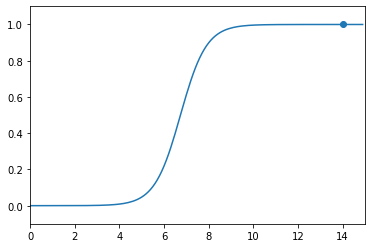

epoch=1999, 기울기=1.9065, 절편=-12.9489


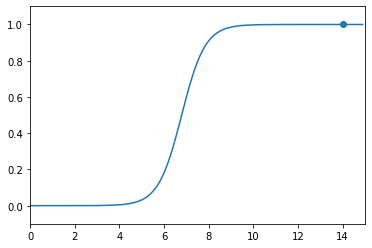

In [ ]:
# 시그모이드 함수를 모른 상태에서 확인하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data_ = np.array(data)[:, 0] 
y_data_ = np.array(data)[:, 1]

plt.scatter(x_data_, y_data_, s = 100, c = 'blue')
plt.xlim(0, 15)
plt.show()

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

#학습률
lr = 0.05

# 학습 수
epochs = 2000

# 시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

for i in range(epochs):
    for x_data_, y_data_ in data:
        a_diff = x_data_ * (sigmoid(a * x_data_ + b) - y_data_)
        b_diff = sigmoid( a * x_data_ + b) - y_data_
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 500 == 0:
            print("epoch=%.f, 기울기=%0.4f, 절편=%.04f" % (i, a, b))

    if i % 500 == 0:
        # 앞서 구한 기울기와 절편을 이용해 그래프 그리기
        print("epoch=%.f, 기울기=%0.4f, 절편=%.04f" % (i, a, b))
        plt.scatter(x_data_, y_data_)
        plt.xlim(0, 15)
        plt.ylim(-.1, 1.1)

        x_range = (np.arange(0, 15, 0.1)) # 그래프로 나타낼 x값의 범위 정하기
        plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
        plt.show()
          

# 최종 그래프 그리기
print("epoch=%.f, 기울기=%0.4f, 절편=%.04f" % (i, a, b))
plt.scatter(x_data_, y_data_)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

x_range = (np.arange(0, 15, 0.1)) # 그래프로 나타낼 x값의 범위 정하기
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
plt.show()

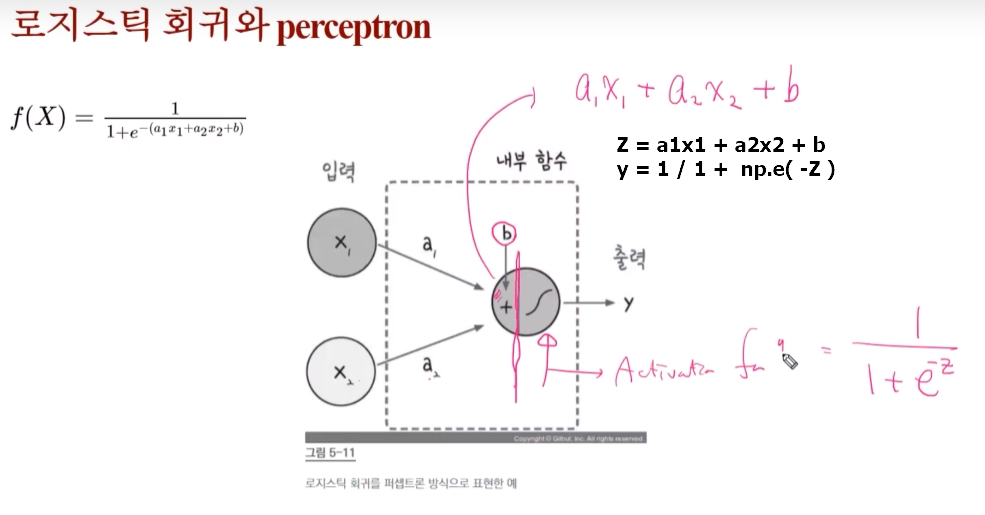

XOR 문제 해결을 위한 멀티 퍼셉트론
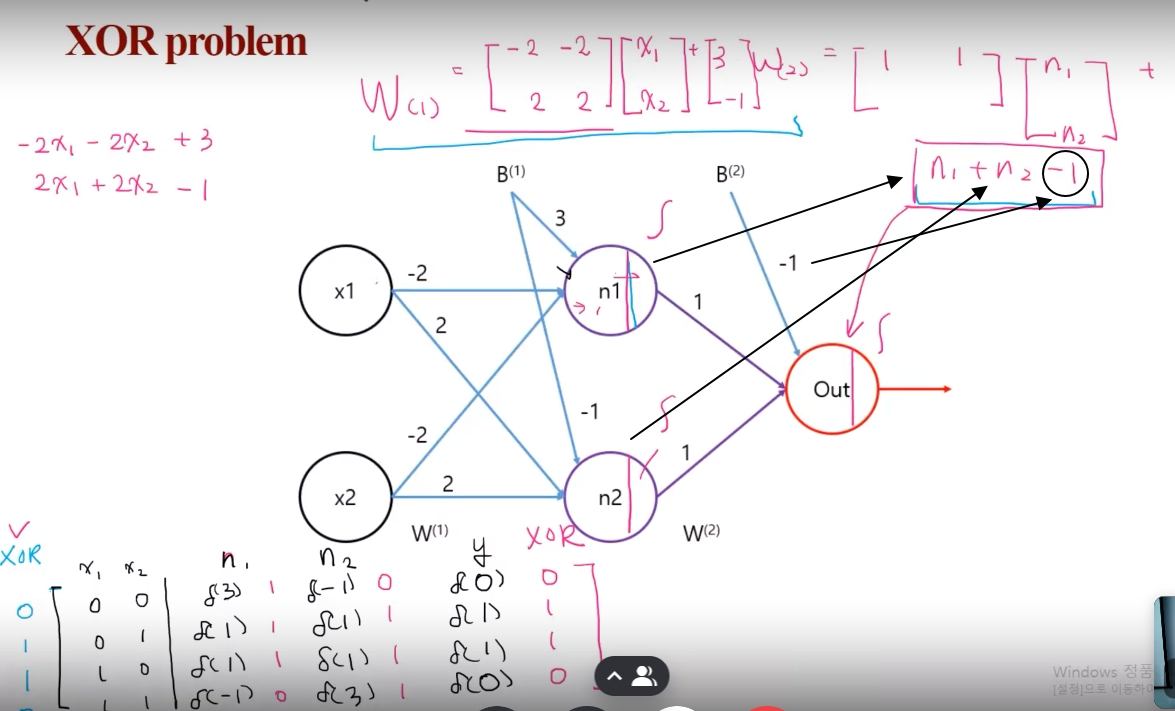

In [ ]:
# 다중 퍼셉트론을 이용하여 XOR 문제를 풀어본다.
# 전자로 치자면 AND, OR 게이트 하나로 처리할 수 없기 때문에, 
# 2개의 로직을 묶고, 2차로 다시 묶으면 해결할 수 있다라는 것이 다중 레이어를 사용한 퍼셉트론
# 즉 다중 퍼셉트론으로 이해.

import numpy as np

# 가중치
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])

#바이어스
b1 = 3
b2 = -1
b3 = -1

# 함수
def MLP(x, w, b):
    # 원래는 시그모이드 함수를 써야 하는데,
    # 계산하기 편하라고 시그모이드 함수를 쓰지 않고, 션형 함수로 대체했다.
    # 값이 1이상이면 모두 1로 처리한다.(시그모이드의 경우는 0.5이상이면 1로 처리)
    # 신경이나 신호의 임계점을 넘는 경우, 어떤 디지털 신호로 처리할지 하는 것과 유사하다.
    y = np.sum(x*w) + b

    if y >= 1:
        return 1
    else:
        return 0

## n2
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

## n1
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

## y out, 즉 n1 + n2 +b
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

##
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))


for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print('입력 값 : ', str(x), '출력값 : ', str(y))


# 결과는 아래와 같이 나온다.
# 입력 값 :  (0, 0) 출력값 :  0
# 입력 값 :  (1, 0) 출력값 :  1
# 입력 값 :  (0, 1) 출력값 :  1
# 입력 값 :  (1, 1) 출력값 :  0

입력 값 :  (0, 0) 출력값 :  0
입력 값 :  (1, 0) 출력값 :  1
입력 값 :  (0, 1) 출력값 :  1
입력 값 :  (1, 1) 출력값 :  0
